In [22]:
import pandas as pd
import numpy as np
import re
import nltk
import tokenizers
import nltk
import tokenizers
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import token
nltk.download('stopwords')
!pip install wordcloud
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/299.9 kB ? eta -:--:--
   ------- ------------------------------- 61.4/299.9 kB 363.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 521.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 521.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/299.9 kB 368.6 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 472.1 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 556.2 kB/s eta 0:00:01
   ------------------

In [2]:
df = pd.read_csv(r'C:\Users\hazem\Downloads\Reviews.csv\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df = df[df['Score'] != 3]  # remove neutral reviews
df['label'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

df = df[['Text', 'label']]  # keep only needed columns
df.dropna(inplace=True)

df.head()

,Text,label
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525814 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    525814 non-null  object
 1   label   525814 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.0+ MB


,label
count,525814.000000
mean,0.843981
std,0.362874
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [6]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [9]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()                           # lowercase
    text = re.sub(r'[^\w\s]', '', text)                # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['Text'].apply(preprocess_text)

df[['Text', 'clean_text']].head()


,Text,clean_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [11]:

df = df.sample(50000, random_state=42)

# TF-IDF with fewer features if needed (default 5000)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])  # KEEP as sparse matrix
y = df['label']

print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (50000, 5000)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (40000, 5000) Test size: (10000, 5000)


In [15]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Log Reg Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Log Reg Accuracy: 0.9184
              precision    recall  f1-score   support

           0       0.86      0.56      0.68      1542
           1       0.93      0.98      0.95      8458

    accuracy                           0.92     10000
   macro avg       0.89      0.77      0.82     10000
weighted avg       0.91      0.92      0.91     10000



In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)
print("NB accuracy:",accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

NB accuracy: 0.8775
              precision    recall  f1-score   support

           0       0.92      0.23      0.36      1542
           1       0.88      1.00      0.93      8458

    accuracy                           0.88     10000
   macro avg       0.90      0.61      0.65     10000
weighted avg       0.88      0.88      0.84     10000



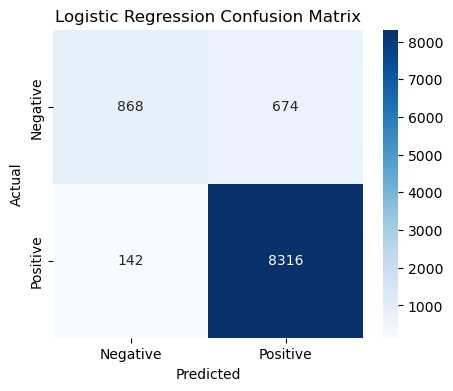

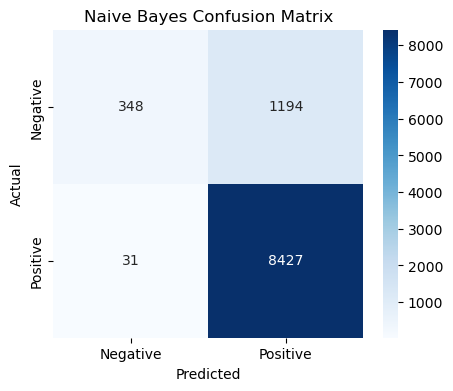

In [ ]:
def plot_conf_matrix(y_true,y_pred,title):
    cm = confusion_matrix (y_true,y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_log, "Logistic Regression Confusion Matrix")
plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")


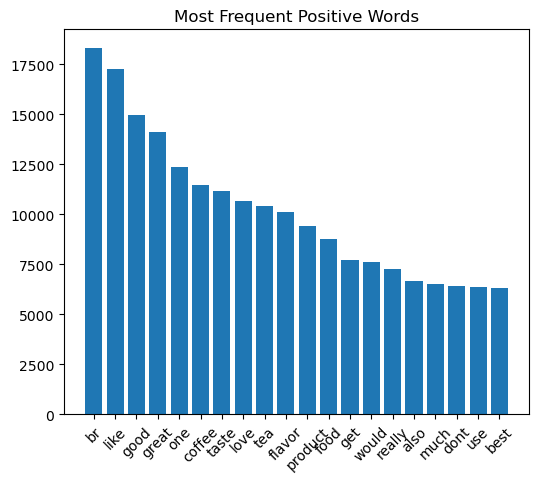

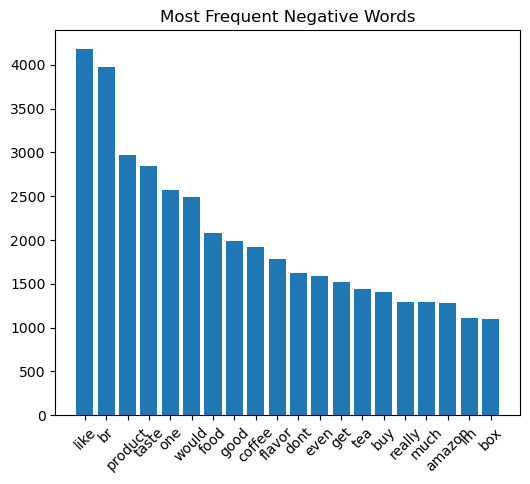

In [27]:
def plot_top_words(words_list, title):
    counts = Counter(words_list).most_common(20)
    words, freq = zip(*counts)
    plt.figure(figsize=(6,5))
    plt.bar(words, freq)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

positive_words = ' '.join(df[df['label'] == 1]['clean_text']).split()
plot_top_words(positive_words, "Most Frequent Positive Words")

negative_words = ' '.join(df[df['label'] == 0]['clean_text']).split()
plot_top_words(negative_words, "Most Frequent Negative Words")


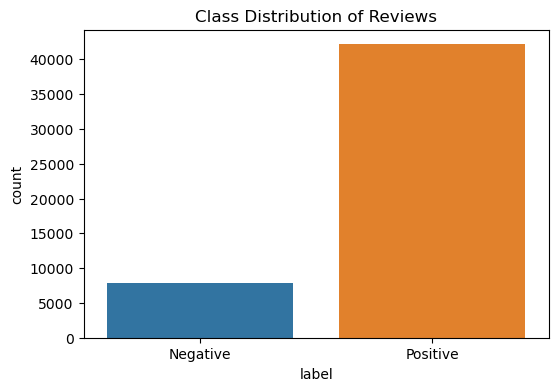

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title("Class Distribution of Reviews")
plt.show()

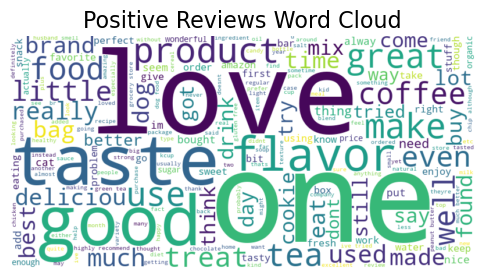

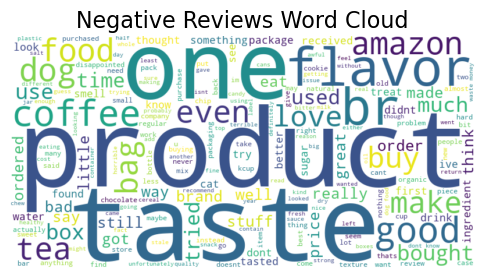

In [28]:
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Positive reviews word cloud
positive_text = " ".join(df[df['label'] == 1]['clean_text'])
plot_wordcloud(positive_text, "Positive Reviews Word Cloud")

# Negative reviews word cloud
negative_text = " ".join(df[df['label'] == 0]['clean_text'])
plot_wordcloud(negative_text, "Negative Reviews Word Cloud")


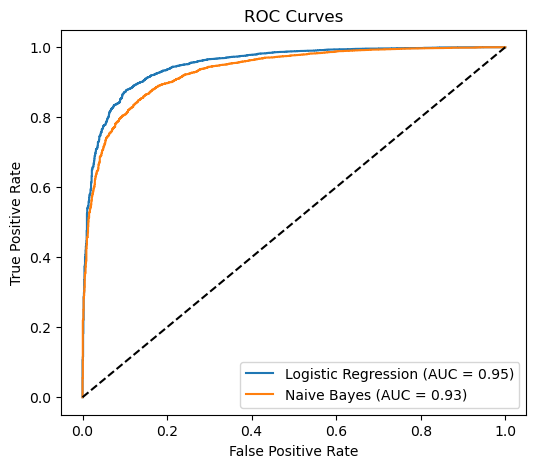

In [25]:
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{title} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(6,5))

# Logistic Regression ROC
y_pred_log_proba = log_model.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_pred_log_proba, "Logistic Regression")

# Naive Bayes ROC
y_pred_nb_proba = nb_model.predict_proba(X_test)[:, 1]
plot_roc(y_test, y_pred_nb_proba, "Naive Bayes")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


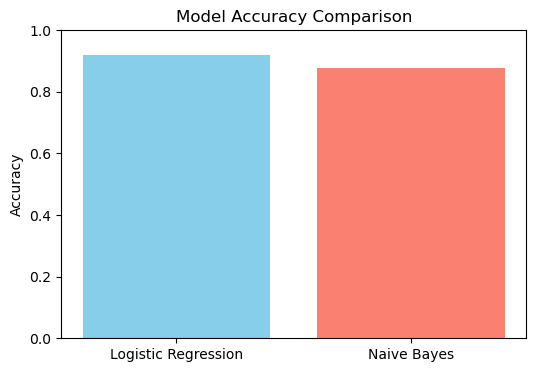

In [26]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_nb = accuracy_score(y_test, y_pred_nb)

plt.figure(figsize=(6,4))
plt.bar(['Logistic Regression', 'Naive Bayes'], [acc_log, acc_nb], color=['skyblue', 'salmon'])
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.show()
